# Final Project - Team Monarch 2.0
## SDM Visualization

#### An interactive system to display species distribution models and biodiversity maps of North American butterflies along with animated gifs for each species to show migration patterns.

#### Requirements

The widgets displayed in the system may not show up in your Jupyter Notebook without first installing ipywidgets and enabling the extensions. Try the commands listed below:

```
pip install ipywidgets
jupyter nbextension enable --py widgetsnbextension
OR
jupyter nbextension enable --py --sys-prefix widgetsnbextension
```

In [1]:
import glob, os
import imageio
import ipywidgets as wg
from IPython.display import Image
from IPython.display import display
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual

In [2]:
style = {'description_width': 'initial'}
name = wg.Text(value='Name', description="Species: ")
algo = wg.Dropdown(options = ["CTA", "GLM", "RF"], description="Algorithm: ", style=style)
threshold = wg.Dropdown(options = ['1', '10', '50'], description="Prediction Threshold: ", style=style)
month = wg.SelectionSlider(description="Month: ", options=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'all'])
speed = wg.FloatSlider(value=.5,min=0,max=1.0,step=0.1,description='Animation Speed:',style=style)
display(name, algo, threshold, month, speed)

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

NOTE: In the directory, there are only files for oct/nov/dec of the few species there (e.g. Papilio_glaucus), so if you leave the slider at jan-september, you're gonna have a bad time. When the values for the GUI are changed, no need to hit enter, leave them, and move to the cell below. Once you hit enter in the cell below, the values in the above GUI are registered and appropriately saved. A map (that unfortunately isn't animated) is generated using the user's inputs. It is a possibility to add multiple inline plots, without doing the GIF format, which should have something close to the same effect, but that isn't necessary yet.

----------------------------------------
Species:  Papilio_glaucus
Algorithm:  CTA
Prediction Threshold:  10
Month:  nov
----------------------------------------


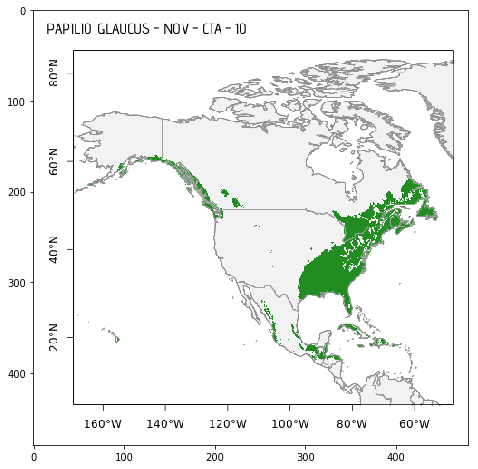

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageFont, ImageDraw 
%matplotlib inline

print('----------------------------------------')
print('Species: ', name.value)
print('Algorithm: ', algo.value)
print('Prediction Threshold: ', threshold.value)
print('Month: ', str(month.value))
print('----------------------------------------')
filename = "./SDMs/" + name.value + "/" + month.value + "/" + algo.value + "-" + threshold.value + ".png"
if os.path.isfile(filename):
    img = Image.open(filename)
    fig = plt.figure()
    fig.set_size_inches(14, 8, forward=True)
    plt.imshow(img)
    plt.show(img)

In [4]:
stack_algo = wg.Dropdown(options = ["CTA", "GLM", "RF"], description="Algorithm: ")
stack_threshold = wg.Dropdown(options = ['1', '10', '50'], description="Prediction Threshold: ")
display(stack_algo, stack_threshold)

A Jupyter Widget

A Jupyter Widget

In [6]:
import matplotlib.pyplot as plt
from PIL import Image as im
from PIL import ImageFont, ImageDraw 
%matplotlib inline

print('----------------------------------------')
print('Algorithm: ', stack_algo.value)
print('Prediction Threshold: ', stack_threshold.value)
print('----------------------------------------')
filename = "./Stack/" + stack_algo.value + "-" + stack_threshold.value + ".png"
if os.path.isfile(filename):
    img = im.open(filename)
    fig = plt.figure()
    fig.set_size_inches(14, 8, forward=True)
    plt.imshow(img)
    plt.show(img)

----------------------------------------
Algorithm:  CTA
Prediction Threshold:  10
----------------------------------------


# Creating GIF (used in subsequent codeblocks)

In [17]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [35]:
import glob, os
import imageio
from IPython.display import Image
from IPython.display import display, HTML

'''
If a GIF is generated for a species for some predictive factor (i.e. 1, 10, or 50) for a given algorithm,
two more GIFs are generated for the other two algorithms. If the user submits 'Papilio_glaucus; "CTA"; 10',
GIFs are generated for 'Papilio_glaucus RF 10 and Papilio_glaucus GLM 10.

Only two are covered right now, given GLM was not saved into the prototype directory. Code must be adapted to datastore.
'''

months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'all']
algos = ["CTA", "GLM", "RF"]
thresholds = ['1', '10', '50']

if not os.path.exists('gifs/'):
    os.makedirs('gifs/')

gifs = []
for algo in algos:
    for threshold  in thresholds:
        images = []
        for month in months:
            filename = "./SDMs/" + name.value + "/" + month + "/" + algo + "-" + threshold + ".png"
            if os.path.isfile(filename):
                img = im.open(filename)
                draw = ImageDraw.Draw(img)
                draw.rectangle(((0, 0), (250, 40)), fill="white")
                font = ImageFont.truetype("fonts/adventpro.ttf", 16)
                draw.text((15, 10),name.value.upper() + ' - ' + month.upper() + ' - ' + algo + ' - ' + threshold,(0,0,0),font=font)
                img.save(filename)
                images.append(imageio.imread(filename))
        if len(images) > 0:
            imageio.mimsave('gifs/' + name.value + '-' + algo + '-' + threshold + '.gif', images, duration=speed.value)
            display(Image(url = 'gifs/' + name.value + '-' + algo + '-' + threshold + '.gif', width = 350))

# Another way of bringing up a titled image without animation

In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('gifs/' + name.value + '-' + algo.value + '.gif')
imgplot = plt.imshow(img)
plt.suptitle(name.value + " " + month.value)
plt.show()

AttributeError: 'str' object has no attribute 'value'

# A way of animating the GIFs, but no label/title yet

In [24]:
from IPython import display

def display_gif(fn):
    #return (display.HTML('<h1>{}</h1>'.format(fn)), display.HTML('<img src="{}">'.format(fn)))
    return display.HTML('<img src="{}">'.format(fn))
display_gif('gifs/' + name.value + '-' + algo.value + '.gif')

#fn = 'gifs/' + name.value + '-' + algo.value + '.gif'
#x = display.HTML('<h1>{}</h1>'.format(fn))
#y = display.HTML('<img src="{}">'.format(fn))
#display(x, y)

AttributeError: 'str' object has no attribute 'value'

## Test (Horrendous mess)

In [12]:
from IPython.display import display, HTML, Image

def Images(images, header=heading, width="100%"): # to match Image syntax
    if type(width)==type(1): width = "{}px".format(width)
    html = ["<table style='width:{}'><tr>".format(width)]
    if header is not None:
        html += ["<th>{}</th>".format(h) for h in header]

    for image in images:
        html.append("<td>'<img src='{}' /></td>".format(images))
    html.append("</tr></table>")
    display(HTML(''.join(html)))
Images(('gifs/' + name.value + '-' + algo.value + '.gif'), heading)

def display_gif(fn):
    return display.HTML(['<th>{}</th>'.format(h) for h in header], '<img src="{}">'.format(fn))

NameError: name 'heading' is not defined